# Bringing in and Cleaning Covid Data
Inspired by the New York Times interactive essay, [**13 Final Texts From Loved Ones Lost to Covid**](https://www.nytimes.com/interactive/2022/05/20/opinion/one-million-covid-deaths-texts.html)
<hr>

Data Sources:
- Covid Data from [New York Times](https://github.com/nytimes/covid-19-data)
- Population Data from [U.S. Census Bureau](https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/), 2019
- County Names Data from [Chuck Connell](https://raw.githubusercontent.com/ChuckConnell/articles/master/fips2county.tsv)


In [1]:
import pandas as pd

In [2]:
covid_2020 = pd.read_csv('us-counties-2020.csv')
covid_2021 = pd.read_csv('us-counties-2021.csv')
covid_2022 = pd.read_csv('us-counties-2022.csv')

In [3]:
covid_2020.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


In [4]:
covid_2020.deaths.sum()

46413785.0

In [5]:
covid_2021.head(2)

,date,county,state,fips,cases,deaths
0,2021-01-01,Autauga,Alabama,1001.0,4239,50.0
1,2021-01-01,Baldwin,Alabama,1003.0,13823,169.0


In [6]:
covid_2022.head(2)

,date,county,state,fips,cases,deaths
0,2022-01-01,Autauga,Alabama,1001.0,11018,160.0
1,2022-01-01,Baldwin,Alabama,1003.0,39911,593.0


In [7]:
covid_all = pd.concat([covid_2020, covid_2021, covid_2022])
covid_all

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
455521,2022-05-20,Sweetwater,Wyoming,56037.0,11119,126.0
455522,2022-05-20,Teton,Wyoming,56039.0,10116,16.0
455523,2022-05-20,Uinta,Wyoming,56041.0,5647,39.0
455524,2022-05-20,Washakie,Wyoming,56043.0,2362,44.0


In [8]:
covid_all.to_csv('covid-data.csv')

## Bringing in FIPS census data

In [9]:
pd.read_csv('fips-data.csv').head(2)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062


In [10]:
population_data = pd.read_csv('fips-data.csv')

In [11]:
population_data = population_data[['CTYNAME', 'POPESTIMATE2019', 'STNAME']]
population_data

,CTYNAME,POPESTIMATE2019,STNAME
0,Alabama,4903185,Alabama
1,Autauga County,55869,Alabama
2,Baldwin County,223234,Alabama
3,Barbour County,24686,Alabama
4,Bibb County,22394,Alabama
...,...,...,...
3188,Sweetwater County,42343,Wyoming
3189,Teton County,23464,Wyoming
3190,Uinta County,20226,Wyoming
3191,Washakie County,7805,Wyoming


In [12]:
population_data['county_'] = population_data.CTYNAME.str.replace(' County', '')

In [13]:
population_data

,CTYNAME,POPESTIMATE2019,STNAME,county_
0,Alabama,4903185,Alabama,Alabama
1,Autauga County,55869,Alabama,Autauga
2,Baldwin County,223234,Alabama,Baldwin
3,Barbour County,24686,Alabama,Barbour
4,Bibb County,22394,Alabama,Bibb
...,...,...,...,...
3188,Sweetwater County,42343,Wyoming,Sweetwater
3189,Teton County,23464,Wyoming,Teton
3190,Uinta County,20226,Wyoming,Uinta
3191,Washakie County,7805,Wyoming,Washakie


In [14]:
fips = pd.read_csv('fips-data2.csv')
fips

,StateFIPS,CountyFIPS_3,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY
0,1,1,Autauga,Alabama,1001,AL,AL | AUTAUGA
1,1,3,Baldwin,Alabama,1003,AL,AL | BALDWIN
2,1,5,Barbour,Alabama,1005,AL,AL | BARBOUR
3,1,7,Bibb,Alabama,1007,AL,AL | BIBB
4,1,9,Blount,Alabama,1009,AL,AL | BLOUNT
...,...,...,...,...,...,...,...
3137,56,37,Sweetwater,Wyoming,56037,WY,WY | SWEETWATER
3138,56,39,Teton,Wyoming,56039,WY,WY | TETON
3139,56,41,Uinta,Wyoming,56041,WY,WY | UINTA
3140,56,43,Washakie,Wyoming,56043,WY,WY | WASHAKIE


In [15]:
fips.head(2)

,StateFIPS,CountyFIPS_3,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY
0,1,1,Autauga,Alabama,1001,AL,AL | AUTAUGA
1,1,3,Baldwin,Alabama,1003,AL,AL | BALDWIN


In [16]:
fips = fips[['CountyName', 'CountyFIPS', 'StateName', 'StateAbbr']]
fips

,CountyName,CountyFIPS,StateName,StateAbbr
0,Autauga,1001,Alabama,AL
1,Baldwin,1003,Alabama,AL
2,Barbour,1005,Alabama,AL
3,Bibb,1007,Alabama,AL
4,Blount,1009,Alabama,AL
...,...,...,...,...
3137,Sweetwater,56037,Wyoming,WY
3138,Teton,56039,Wyoming,WY
3139,Uinta,56041,Wyoming,WY
3140,Washakie,56043,Wyoming,WY


In [17]:
covid_all.dropna(inplace=True)

In [18]:
covid_all.fips = covid_all.fips.astype(int).astype(str)

In [19]:
covid_all.deaths = covid_all.deaths.astype(int)

In [20]:
covid_all.head(2)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0


In [21]:
population_data.head(2)

,CTYNAME,POPESTIMATE2019,STNAME,county_
0,Alabama,4903185,Alabama,Alabama
1,Autauga County,55869,Alabama,Autauga


In [22]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CTYNAME          3193 non-null   object
 1   POPESTIMATE2019  3193 non-null   int64 
 2   STNAME           3193 non-null   object
 3   county_          3193 non-null   object
dtypes: int64(1), object(3)
memory usage: 99.9+ KB


In [23]:
fips.head(2)

,CountyName,CountyFIPS,StateName,StateAbbr
0,Autauga,1001,Alabama,AL
1,Baldwin,1003,Alabama,AL


In [24]:
fips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CountyName  3142 non-null   object
 1   CountyFIPS  3142 non-null   int64 
 2   StateName   3142 non-null   object
 3   StateAbbr   3142 non-null   object
dtypes: int64(1), object(3)
memory usage: 98.3+ KB


In [25]:
fips.CountyFIPS = fips.CountyFIPS.astype(str)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Merging

In [26]:
population_data.head(2)

,CTYNAME,POPESTIMATE2019,STNAME,county_
0,Alabama,4903185,Alabama,Alabama
1,Autauga County,55869,Alabama,Autauga


In [27]:
population_data.shape[0]

3193

In [28]:
fips.head(2)

,CountyName,CountyFIPS,StateName,StateAbbr
0,Autauga,1001,Alabama,AL
1,Baldwin,1003,Alabama,AL


In [29]:
fips.shape[0]

3142

In [30]:
fips_state = population_data.merge(fips, how = 'inner', left_on=['county_', 'STNAME'], \
                                   right_on=['CountyName', 'StateName'])
fips_state

,CTYNAME,POPESTIMATE2019,STNAME,county_,CountyName,CountyFIPS,StateName,StateAbbr
0,Autauga County,55869,Alabama,Autauga,Autauga,1001,Alabama,AL
1,Baldwin County,223234,Alabama,Baldwin,Baldwin,1003,Alabama,AL
2,Barbour County,24686,Alabama,Barbour,Barbour,1005,Alabama,AL
3,Bibb County,22394,Alabama,Bibb,Bibb,1007,Alabama,AL
4,Blount County,57826,Alabama,Blount,Blount,1009,Alabama,AL
...,...,...,...,...,...,...,...,...
3144,Sweetwater County,42343,Wyoming,Sweetwater,Sweetwater,56037,Wyoming,WY
3145,Teton County,23464,Wyoming,Teton,Teton,56039,Wyoming,WY
3146,Uinta County,20226,Wyoming,Uinta,Uinta,56041,Wyoming,WY
3147,Washakie County,7805,Wyoming,Washakie,Washakie,56043,Wyoming,WY


In [31]:
fips_state.columns

Index(['CTYNAME', 'POPESTIMATE2019', 'STNAME', 'county_', 'CountyName',
       'CountyFIPS', 'StateName', 'StateAbbr'],
      dtype='object')

In [32]:
fips_pop = fips_state.drop(columns=['CountyName', 'county_', 'StateName'])\
        .rename(columns={'CTYNAME':'county', 'POPESTIMATE2019':'population', \
                         'STNAME':'state', 'CountyFIPS':'fips_code', 'StateAbbr':'state_abbr'})
fips_pop

,county,population,state,fips_code,state_abbr
0,Autauga County,55869,Alabama,1001,AL
1,Baldwin County,223234,Alabama,1003,AL
2,Barbour County,24686,Alabama,1005,AL
3,Bibb County,22394,Alabama,1007,AL
4,Blount County,57826,Alabama,1009,AL
...,...,...,...,...,...
3144,Sweetwater County,42343,Wyoming,56037,WY
3145,Teton County,23464,Wyoming,56039,WY
3146,Uinta County,20226,Wyoming,56041,WY
3147,Washakie County,7805,Wyoming,56043,WY


In [33]:
fips_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3149 entries, 0 to 3148
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      3149 non-null   object
 1   population  3149 non-null   int64 
 2   state       3149 non-null   object
 3   fips_code   3149 non-null   object
 4   state_abbr  3149 non-null   object
dtypes: int64(1), object(4)
memory usage: 147.6+ KB


In [34]:
covid_all.head(2)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0


In [35]:
covid_all.merge(fips_pop, how = 'inner', left_on = 'fips', right_on = 'fips_code').to_csv('covid_data2.csv')

In [36]:
covid3 = covid_all.merge(fips_pop, how = 'inner', left_on = 'fips', right_on = 'fips_code')
covid3

,date,county_x,state_x,fips,cases,deaths,county_y,population,state_y,fips_code,state_abbr
0,2020-01-21,Snohomish,Washington,53061,1,0,Snohomish County,822083,Washington,53061,WA
1,2020-01-22,Snohomish,Washington,53061,1,0,Snohomish County,822083,Washington,53061,WA
2,2020-01-23,Snohomish,Washington,53061,1,0,Snohomish County,822083,Washington,53061,WA
3,2020-01-24,Snohomish,Washington,53061,1,0,Snohomish County,822083,Washington,53061,WA
4,2020-01-25,Snohomish,Washington,53061,1,0,Snohomish County,822083,Washington,53061,WA
...,...,...,...,...,...,...,...,...,...,...,...
2443090,2022-05-16,Kalawao,Hawaii,15005,1,0,Kalawao County,86,Hawaii,15005,HI
2443091,2022-05-17,Kalawao,Hawaii,15005,1,0,Kalawao County,86,Hawaii,15005,HI
2443092,2022-05-18,Kalawao,Hawaii,15005,1,0,Kalawao County,86,Hawaii,15005,HI
2443093,2022-05-19,Kalawao,Hawaii,15005,1,0,Kalawao County,86,Hawaii,15005,HI


In [40]:
covid3['regions'] = covid3.state_abbr.map({
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
})

In [42]:
covid3.to_csv('covid_data.csv')

In [50]:
covid3[covid3.state_x == 'New York']

,date,county_x,state_x,fips,cases,deaths,county_y,population,state_y,fips_code,state_abbr,regions
27959,2020-03-04,Westchester,New York,36119,9,0,Westchester County,967506,New York,36119,NY,N
27960,2020-03-05,Westchester,New York,36119,17,0,Westchester County,967506,New York,36119,NY,N
27961,2020-03-06,Westchester,New York,36119,33,0,Westchester County,967506,New York,36119,NY,N
27962,2020-03-07,Westchester,New York,36119,69,0,Westchester County,967506,New York,36119,NY,N
27963,2020-03-08,Westchester,New York,36119,81,0,Westchester County,967506,New York,36119,NY,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1764511,2022-05-16,Yates,New York,36123,3729,40,Yates County,24913,New York,36123,NY,N
1764512,2022-05-17,Yates,New York,36123,3736,40,Yates County,24913,New York,36123,NY,N
1764513,2022-05-18,Yates,New York,36123,3747,40,Yates County,24913,New York,36123,NY,N
1764514,2022-05-19,Yates,New York,36123,3756,40,Yates County,24913,New York,36123,NY,N


<AxesSubplot:>

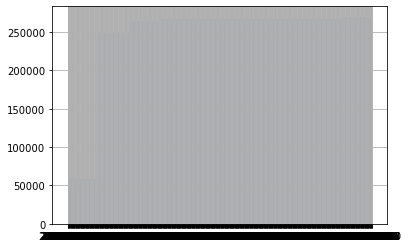

In [51]:
covid3.date.hist()

In [53]:
covid_all

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
455521,2022-05-20,Sweetwater,Wyoming,56037,11119,126
455522,2022-05-20,Teton,Wyoming,56039,10116,16
455523,2022-05-20,Uinta,Wyoming,56041,5647,39
455524,2022-05-20,Washakie,Wyoming,56043,2362,44


In [56]:
covid_all[(covid_all.county == 'Sweetwater') & (covid_all.date.str.contains('2022-02-1'))]

,date,county,state,fips,cases,deaths
133356,2022-02-10,Sweetwater,Wyoming,56037,10790,119
136609,2022-02-11,Sweetwater,Wyoming,56037,10817,119
139862,2022-02-12,Sweetwater,Wyoming,56037,10817,119
143115,2022-02-13,Sweetwater,Wyoming,56037,10817,119
146366,2022-02-14,Sweetwater,Wyoming,56037,10867,119
149616,2022-02-15,Sweetwater,Wyoming,56037,10901,122
152867,2022-02-16,Sweetwater,Wyoming,56037,10920,122
156118,2022-02-17,Sweetwater,Wyoming,56037,10926,122
159369,2022-02-18,Sweetwater,Wyoming,56037,10937,122
162620,2022-02-19,Sweetwater,Wyoming,56037,10937,122


In [68]:
covid_all.sort_values(by = ['county', 'state'], inplace = True)

In [61]:
covid_all[covid_all.date == '2022-05-20']

,date,county,state,fips,cases,deaths
452265,2022-05-20,Autauga,Alabama,1001,15891,216
452266,2022-05-20,Baldwin,Alabama,1003,56031,681
452267,2022-05-20,Barbour,Alabama,1005,5692,98
452268,2022-05-20,Bibb,Alabama,1007,6469,105
452269,2022-05-20,Blount,Alabama,1009,15039,243
...,...,...,...,...,...,...
455521,2022-05-20,Sweetwater,Wyoming,56037,11119,126
455522,2022-05-20,Teton,Wyoming,56039,10116,16
455523,2022-05-20,Uinta,Wyoming,56041,5647,39
455524,2022-05-20,Washakie,Wyoming,56043,2362,44


In [63]:
covid_all[covid_all.date == '2022-05-20'].deaths.sum()

949827

In [66]:
covid_all[covid_all.date == '2022-04-19']

,date,county,state,fips,cases,deaths
351305,2022-04-19,Autauga,Alabama,1001,15755,215
351306,2022-04-19,Baldwin,Alabama,1003,55564,679
351307,2022-04-19,Barbour,Alabama,1005,5658,98
351308,2022-04-19,Bibb,Alabama,1007,6428,103
351309,2022-04-19,Blount,Alabama,1009,14961,243
...,...,...,...,...,...,...
354556,2022-04-19,Sweetwater,Wyoming,56037,11070,124
354557,2022-04-19,Teton,Wyoming,56039,9975,16
354558,2022-04-19,Uinta,Wyoming,56041,5625,39
354559,2022-04-19,Washakie,Wyoming,56043,2356,44


In [70]:
covid_all.head(50)

,date,county,state,fips,cases,deaths
5000,2020-03-19,Abbeville,South Carolina,45001,1,0
5873,2020-03-20,Abbeville,South Carolina,45001,1,0
6877,2020-03-21,Abbeville,South Carolina,45001,1,0
7997,2020-03-22,Abbeville,South Carolina,45001,1,0
9208,2020-03-23,Abbeville,South Carolina,45001,1,0
10533,2020-03-24,Abbeville,South Carolina,45001,1,0
12004,2020-03-25,Abbeville,South Carolina,45001,3,0
13626,2020-03-26,Abbeville,South Carolina,45001,4,0
15373,2020-03-27,Abbeville,South Carolina,45001,4,0
17227,2020-03-28,Abbeville,South Carolina,45001,4,0


In [101]:
covid_all.sort_values(by = 'fips')

,date,county,state,fips,cases,deaths
452583,2022-05-20,Kent,Delaware,10001,52621,652
816900,2020-12-11,Kent,Delaware,10001,6706,139
813654,2020-12-10,Kent,Delaware,10001,6536,139
810410,2020-12-09,Kent,Delaware,10001,6431,139
807165,2020-12-08,Kent,Delaware,10001,6292,139
...,...,...,...,...,...,...
776251,2021-08-28,Windham,Connecticut,9015,11486,197
773003,2021-08-27,Windham,Connecticut,9015,11486,197
769755,2021-08-26,Windham,Connecticut,9015,11465,197
763259,2021-08-24,Windham,Connecticut,9015,11444,197


In [ ]:

for fips_code in covid_all.fips:
    